# 📊 Tổng quan Dữ liệu - EDA (Exploratory Data Analysis)

## 1. Cài đặt các thư viện cần thiết

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load dữ liệu

In [12]:
train_df = pd.read_csv("../data/train.csv")

## 3. Tổng quan dữ liệu

### 3.1. Hiển thị 5 dòng đầu tiên

In [13]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 3.2. Kiểm tra thông tin tổng quan của dữ liệu
Lệnh `info()` sẽ cung cấp cái nhìn tổng quát về số lượng dòng, loại dữ liệu của các cột, và số lượng giá trị không thiếu (non-null) trong từng cột.

In [14]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 3.3. Thống kê mô tả về dữ liệu

Lệnh `describe()` sẽ giúp chúng ta xem xét các thống kê mô tả của các cột số, bao gồm trung bình (mean), độ lệch chuẩn (std), giá trị min, max và các quartile.

In [15]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### 3.4. Kiểm tra dữ liệu bị thiếu

Chúng ta cần kiểm tra xem có bao nhiêu giá trị bị thiếu trong từng cột để chuẩn bị cho bước xử lý dữ liệu thiếu.

In [16]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 4. Phân bố sống sót theo giới tính

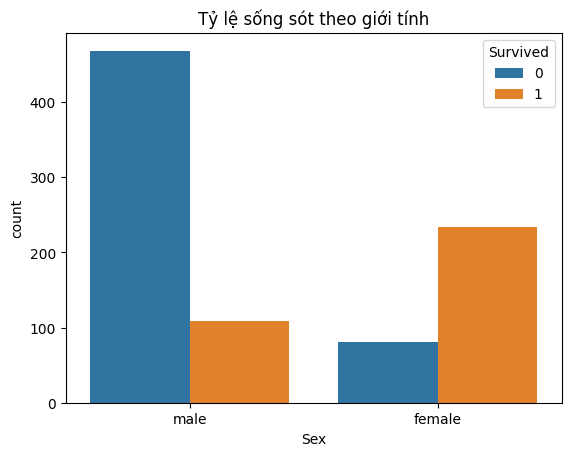

In [17]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Tỷ lệ sống sót theo giới tính')
plt.show()

## 5. Phân bố sống sót theo hạng vé

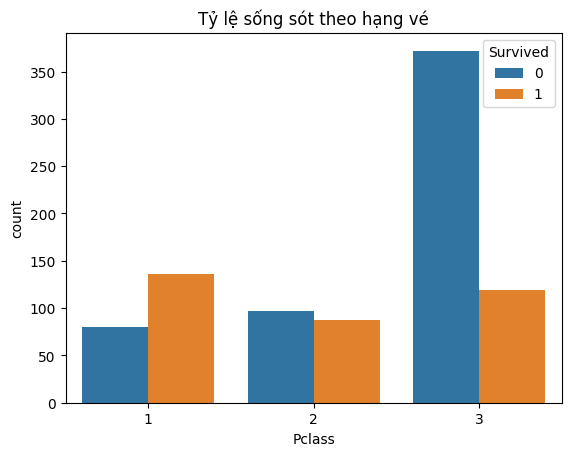

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Tỷ lệ sống sót theo hạng vé')
plt.show()

## 6. Heatmap tương quan

Biểu đồ heatmap thể hiện hệ số tương quan giữa các biến số trong dữ liệu. Hệ số này nằm trong khoảng từ -1 đến 1:
- **+1**: tương quan tuyến tính dương hoàn hảo
- **-1**: tương quan tuyến tính âm hoàn hảo
- **0**: không có tương quan

Từ heatmap, ta có thể xác định những đặc trưng liên quan đến khả năng sống sót (`Survived`) như `Sex`, `Pclass`, `Fare`, `Age`...

Điều này giúp chọn lọc feature hiệu quả cho mô hình sau này.


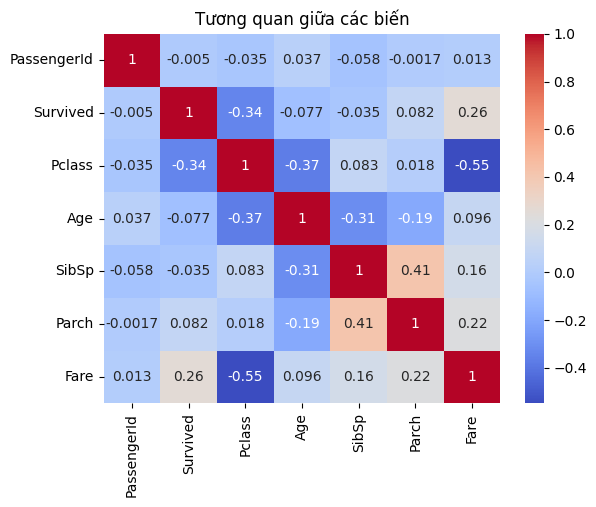

In [19]:
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Tương quan giữa các biến")
plt.show()

## 7. Phân tích độ tuổi

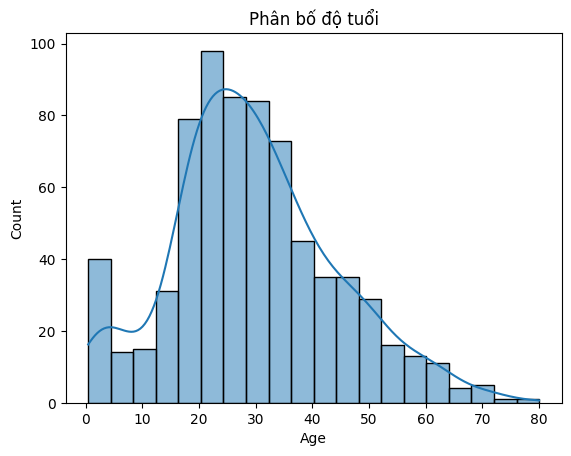

In [20]:
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Phân bố độ tuổi')
plt.show()

## 8. Embarked vs Survived

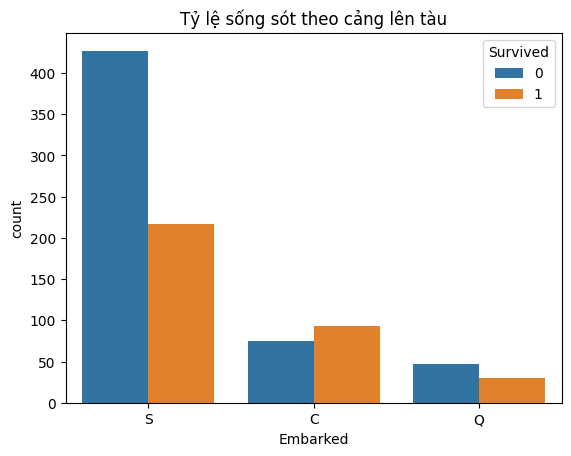

In [21]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Tỷ lệ sống sót theo cảng lên tàu')
plt.show()

## Lưu lại kết quả sơ bộ (tuỳ chọn)

In [22]:
train_df.to_csv("../data/cleaned_initial.csv", index=False)